In [1]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#使用網路上提供的bounding box data來切臉. 
#src: https://ibug.doc.ic.ac.uk/resources/300-W/
#將bounding box的width和height通乘4/3倍取較大者為邊長裁切正方形臉圖
#如果裁切範圍大於原圖邊界，則全部填滿黑色
#在以新正方形臉圖的新原點去計算新的label座標值

# 12 eye landmarks for HELEN

In [2]:
import scipy.io as sio
#自定義resize大小
fix_size = 512
traintest = ['trainset','testset']
#Bounding_Boxes file path
bbox_root = 'D:/share/new_dataset/gaze_dataset_on_web/Bounding_Boxes'
for tt in traintest:
    HELEN_root = 'D:/share/new_dataset/gaze_dataset_on_web/HELEN_FIX/'+tt
    save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/512x512/HELEN/'+ tt
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    test = sio.loadmat(bbox_root + '/bounding_boxes_HELEN_'+tt)
    for bb in test['bounding_boxes']:
        for t in bb:
            img = os.path.join(HELEN_root,t[0][0][0][0][:-4]+'.png')
            txt = os.path.join(HELEN_root,t[0][0][0][0][:-4]+'.txt')
            save_txt = os.path.join(save_root,t[0][0][0][0][:-4]+'.txt')
            img = cv2.imread(img)
            h,w,c = img.shape
            x1 = int(t[0][0][2][0][0]+0.5)
            y1 = int(t[0][0][2][0][1]+0.5)
            x2 = int(t[0][0][2][0][2]+0.5)
            y2 = int(t[0][0][2][0][3]+0.5)
            cx = int((x1 + x2)*0.5+0.5)
            cy = int((y1 + y2)*0.5+0.5)
            width = int((x2 - x1)*2/3+0.5)
            height = int((y2 - y1)*2/3+0.5)
            s = max(width,height)
            lines = np.genfromtxt(txt,delimiter=',')
            lines = lines[:,2:]
            if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                if cx < width:
                    nx1 = 0
                if cx + width > w:
                    nx2 = w
                if cy < height:
                    ny1 = 0
                if cy + height>h:
                    ny2 = h

                crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                print(t[0][0][0][0])

                img = img[ny1:ny2,nx1:nx2]
                print(ny1,ny2,nx1,nx2)
                crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                         s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img
                crop_h,crop_w,_ = crop_img.shape
                ratio_h = fix_size/crop_h
                ratio_w = fix_size/crop_w
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'w+') as f:
                    for i,line in enumerate(lines):
                        x = int((float(line[0])-nx1+(s-(cx-nx1)))*ratio_w+0.5)
                        y = int((float(line[1])-ny1+(s-(cy-ny1)))*ratio_h+0.5)
                        f.write(str(i//7)+','+str(i%7)+','+str(x)+','+str(y)+'\n')
                cv2.imwrite(os.path.join(save_root,t[0][0][0][0][:-4]+'.png'),crop_img)
            else:
                crop_img = img[cy-s:cy+s,cx-s:cx+s]
                ratio_h = fix_size/(s*2)
                ratio_w = fix_size/(s*2)
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'w+') as f:
                    for i,line in enumerate(lines):
                        x = int((float(line[0])-(cx - s))*ratio_w+0.5)
                        y = int((float(line[1])-(cy - s))*ratio_h+0.5)
                        f.write(str(i//7)+','+str(i%7)+','+str(x)+','+str(y)+'\n')        
                cv2.imwrite(os.path.join(save_root,t[0][0][0][0][:-4]+'.png'),crop_img)

1021890651_1.jpg
61 1365 609 2048
1037255513_1.jpg
297 2000 48 2650
103770709_1.jpg
0 480 184 640
103887554_1.jpg
695 2112 201 1639
10405146_1.jpg
420 1510 0 1135
10407038_1.jpg
251 1415 0 1156
1045887134_1.jpg
238 770 75 685
105538305_1.jpg
201 768 168 854
106348540_1.jpg
93 627 164 822
1063957157_1.jpg
0 626 37 807
107473045_1.jpg
0 2880 0 2201
107635070_1.jpg
106 542 0 504
1084919955_1.jpg
54 650 0 589
111168419_1.jpg
0 350 20 412
1115234911_1.jpg
268 894 425 1220
111714273_1.jpg
99 667 0 684
1128654081_1.jpg
96 554 246 808
1129801707_1.jpg
0 683 33 775
11329920_1.jpg
298 1048 526 1363
1144216773_1.jpg
285 996 435 1113
1156177278_1.jpg
215 1365 140 1634
11564757_1.jpg
35 415 0 324
1181568002_1.jpg
587 2075 1051 2473
118471529_1.jpg
0 475 180 610
1188369899_1.jpg
0 683 239 913
118929551_1.jpg
505 1440 501 1659
1208068331_1.jpg
0 1869 232 1990
121204156_1.jpg
179 709 0 476
1224500832_1.jpg
200 3504 0 2336
1227072121_1.jpg
269 931 212 816
1242475639_1.jpg
55 685 0 586
12799337_1.jpg
14

2377409057_1.jpg
393 1914 575 2147
2378246248_1.jpg
278 1956 653 2115
238277879_1.jpg
398 1044 47 851
2382895882_1.jpg
803 2317 734 2504
2385322025_1.jpg
235 1600 810 2316
2385787457_1.jpg
414 1922 563 2225
2385787737_1.jpg
334 1889 595 2211
2385951266_1.jpg
231 1578 82 1882
2386587221_1.jpg
174 612 93 523
2389790920_1.jpg
140 620 0 500
2394089614_1.jpg
104 540 6 426
2396310433_1.jpg
87 509 3 427
2397008230_1.jpg
0 364 62 516
2397581549_1.jpg
650 2000 819 2271
2397869868_1.jpg
840 2842 108 2008
2398691129_1.jpg
448 2000 297 1951
2398725148_1.jpg
404 2336 86 2068
240001815_1.jpg
0 426 3 640
2401967202_1.jpg
372 984 199 881
2402251921_1.jpg
268 1071 428 1600
240281904_1.jpg
482 1192 516 1178
2404969301_1.jpg
579 2048 647 2035
2405801774_1.jpg
418 2048 528 2098
2406435030_1.jpg
275 789 162 683
2407771006_1.jpg
0 427 45 519
2414792473_1.jpg
469 3519 0 2423
2416614295_1.jpg
129 859 23 615
2419189561_1.jpg
132 640 0 456
2426631349_1.jpg
207 589 59 421
2430537397_1.jpg
1 546 112 660
243053754

3220402975_1.jpg
98 540 84 754
3222262589_1.jpg
692 2048 858 2186
3230011778_1.jpg
180 610 0 423
3231797341_1.jpg
209 735 330 898
3234996955_1.jpg
90 878 0 814
3243018729_1.jpg
114 950 410 1304
3247810519_1.jpg
0 1944 34 2562
3249818146_1.jpg
262 664 248 716
3255410296_1.jpg
98 768 327 1024


(14, 4)


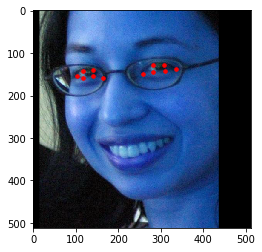

In [5]:
img_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/512x512/HELEN/trainset/'
img = cv2.imread(img_root+'/20315024_2.png')
txt = np.genfromtxt(img_root+'/20315024_2.txt', delimiter=',')
print(txt.shape)
txt = txt[:,2:]
txt = txt.astype(int)
plt.imshow(img)
plt.scatter(txt[0:6,0],txt[0:6,1],s=50,c='r',marker='.')
plt.scatter(txt[7:13,0],txt[7:13,1],s=50,c='r',marker='.')
plt.show()

# 68 facial landmarks for HELEN

In [83]:
import scipy.io as sio
traintest = ['trainset','testset']
bbox_root = 'D:/share/new_dataset/gaze_dataset_on_web/Bounding_Boxes'
fix_size = 256
for tt in traintest:
    HELEN_root = 'D:/share/new_dataset/gaze_dataset_on_web/HELEN_FIX/'+tt
    HELEN_pts = 'D:/share/new_dataset/gaze_dataset_on_web/HELEN/'+tt
    save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/HELEN_68/'+tt
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    test = sio.loadmat(bbox_root + '/bounding_boxes_HELEN_'+tt)
    for bb in test['bounding_boxes']:
        for t in bb:
            img = os.path.join(HELEN_root,t[0][0][0][0][:-4]+'.png')
            txt = os.path.join(HELEN_pts,t[0][0][0][0][:-4]+'.pts')
            save_txt = os.path.join(save_root,t[0][0][0][0][:-4]+'.txt')
            img = cv2.imread(img)
            h,w,c = img.shape
            x1 = int(t[0][0][2][0][0]+0.5)
            y1 = int(t[0][0][2][0][1]+0.5)
            x2 = int(t[0][0][2][0][2]+0.5)
            y2 = int(t[0][0][2][0][3]+0.5)
            cx = int((x1 + x2)*0.5+0.5)
            cy = int((y1 + y2)*0.5+0.5)
            width = int((x2 - x1)*2/3+0.5)
            height = int((y2 - y1)*2/3+0.5)
            s = max(width,height)
            with open(txt,'r') as lines:
                lines = lines.read().split('\n')
                lines = lines[3:71]  
                
            if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                if cx < width:
                    nx1 = 0
                if cx + width > w:
                    nx2 = w
                if cy < height:
                    ny1 = 0
                if cy + height>h:
                    ny2 = h

                crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                print(t[0][0][0][0])

                img = img[ny1:ny2,nx1:nx2]
                print(ny1,ny2,nx1,nx2)
                crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                         s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img
                crop_h,crop_w,_ = crop_img.shape
                ratio_h = fix_size/crop_h
                ratio_w = fix_size/crop_w
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'w+') as f:
                    for i,line in enumerate(lines):
                        line = line.split(' ')
                        x = int((float(line[0])-nx1+(s-(cx-nx1)))*ratio_w+0.5)
                        y = int((float(line[1])-ny1+(s-(cy-ny1)))*ratio_h+0.5)
                        f.write(str(x)+','+str(y)+'\n')
                cv2.imwrite(os.path.join(save_root,t[0][0][0][0][:-4]+'.png'),crop_img)
            else:
                crop_img = img[cy-s:cy+s,cx-s:cx+s]
                ratio_h = fix_size/(s*2)
                ratio_w = fix_size/(s*2)
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'w+') as f:
                    for i,line in enumerate(lines):
                        line = line.split(' ')
                        x = int((float(line[0])-(cx - s))*ratio_w+0.5)
                        y = int((float(line[1])-(cy - s))*ratio_h+0.5)
                        f.write(str(x)+','+str(y)+'\n')        
                cv2.imwrite(os.path.join(save_root,t[0][0][0][0][:-4]+'.png'),crop_img)

1021890651_1.jpg
61 1365 609 2048
1037255513_1.jpg
297 2000 48 2650
103770709_1.jpg
0 480 184 640
103887554_1.jpg
695 2112 201 1639
10405146_1.jpg
420 1510 0 1135
10407038_1.jpg
251 1415 0 1156
1045887134_1.jpg
238 770 75 685
105538305_1.jpg
201 768 168 854
106348540_1.jpg
93 627 164 822
1063957157_1.jpg
0 626 37 807
107473045_1.jpg
0 2880 0 2201
107635070_1.jpg
106 542 0 504
1084919955_1.jpg
54 650 0 589
111168419_1.jpg
0 350 20 412
1115234911_1.jpg
268 894 425 1220
111714273_1.jpg
99 667 0 684
1128654081_1.jpg
96 554 246 808
1129801707_1.jpg
0 683 33 775
11329920_1.jpg
298 1048 526 1363
1144216773_1.jpg
285 996 435 1113
1156177278_1.jpg
215 1365 140 1634
11564757_1.jpg
35 415 0 324
1181568002_1.jpg
587 2075 1051 2473
118471529_1.jpg
0 475 180 610
1188369899_1.jpg
0 683 239 913
118929551_1.jpg
505 1440 501 1659
1208068331_1.jpg
0 1869 232 1990
121204156_1.jpg
179 709 0 476
1224500832_1.jpg
200 3504 0 2336
1227072121_1.jpg
269 931 212 816
1242475639_1.jpg
55 685 0 586
12799337_1.jpg
14

2375918801_1.jpg
174 528 40 430
237609288_1.jpg
87 640 113 685
237609290_1.jpg
99 638 73 681
2377409057_1.jpg
393 1914 575 2147
2378246248_1.jpg
278 1956 653 2115
238277879_1.jpg
398 1044 47 851
2382895882_1.jpg
803 2317 734 2504
2385322025_1.jpg
235 1600 810 2316
2385787457_1.jpg
414 1922 563 2225
2385787737_1.jpg
334 1889 595 2211
2385951266_1.jpg
231 1578 82 1882
2386587221_1.jpg
174 612 93 523
2389790920_1.jpg
140 620 0 500
2394089614_1.jpg
104 540 6 426
2396310433_1.jpg
87 509 3 427
2397008230_1.jpg
0 364 62 516
2397581549_1.jpg
650 2000 819 2271
2397869868_1.jpg
840 2842 108 2008
2398691129_1.jpg
448 2000 297 1951
2398725148_1.jpg
404 2336 86 2068
240001815_1.jpg
0 426 3 640
2401967202_1.jpg
372 984 199 881
2402251921_1.jpg
268 1071 428 1600
240281904_1.jpg
482 1192 516 1178
2404969301_1.jpg
579 2048 647 2035
2405801774_1.jpg
418 2048 528 2098
2406435030_1.jpg
275 789 162 683
2407771006_1.jpg
0 427 45 519
2414792473_1.jpg
469 3519 0 2423
2416614295_1.jpg
129 859 23 615
2419189561

3214021244_1.jpg
843 2175 832 2250
3217491791_1.jpg
558 2048 947 2275
3218989431_1.jpg
422 2835 0 3065
3220402975_1.jpg
98 540 84 754
3222262589_1.jpg
692 2048 858 2186
3230011778_1.jpg
180 610 0 423
3231797341_1.jpg
209 735 330 898
3234996955_1.jpg
90 878 0 814
3243018729_1.jpg
114 950 410 1304
3247810519_1.jpg
0 1944 34 2562
3249818146_1.jpg
262 664 248 716
3255410296_1.jpg
98 768 327 1024


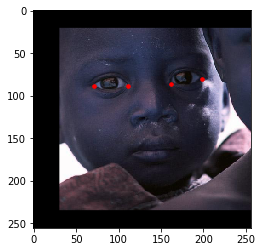

In [84]:
# b = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW/trainset/image_0113.pts' 
a = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/HELEN_68/trainset/2766429378_1.png'
img = cv2.imread(a)
txt = np.genfromtxt(a[:-4]+'.txt',delimiter=',').astype(np.int)
# print(txt.shape[0])
txt = txt[[36,39,42,45],:] 
# print(txt)
plt.imshow(img)
plt.scatter(txt[:,0],txt[:,1],s=50,c='r',marker='.')
plt.show()

# Eval data for HELEN

In [32]:
import scipy.io as sio
fix_size = 512
traintest = ['testset']
bbox_root = 'D:/share/new_dataset/gaze_dataset_on_web/Bounding_Boxes'
for tt in traintest:
    HELEN_root = 'D:/share/new_dataset/gaze_dataset_on_web/HELEN_FIX/'+tt
    save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/512x512/HELEN_eval/'+ tt
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    test = sio.loadmat(bbox_root + '/bounding_boxes_HELEN_'+tt)
    # print(test['bounding_boxes'])
    for bb in test['bounding_boxes']:
        for t in bb:
            img = os.path.join(HELEN_root,t[0][0][0][0][:-4]+'.png')
            save_txt = os.path.join(save_root,'bbox_list.txt')
            img = cv2.imread(img)
            h,w,c = img.shape
            x1 = int(t[0][0][2][0][0]+0.5)
            y1 = int(t[0][0][2][0][1]+0.5)
            x2 = int(t[0][0][2][0][2]+0.5)
            y2 = int(t[0][0][2][0][3]+0.5)
            cx = int((x1 + x2)*0.5+0.5)
            cy = int((y1 + y2)*0.5+0.5)
            width = int((x2 - x1)*2/3+0.5)
            height = int((y2 - y1)*2/3+0.5)
            s = max(width,height)

            if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                if cx < width:
                    nx1 = 0
                if cx + width > w:
                    nx2 = w
                if cy < height:
                    ny1 = 0
                if cy + height>h:
                    ny2 = h

                crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                print(t[0][0][0][0])
                img = img[ny1:ny2,nx1:nx2]
                print(ny1,ny2,nx1,nx2)
                
                crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                         s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img
                
                crop_h,crop_w,_ = crop_img.shape
                ratio_h = fix_size/crop_h
                ratio_w = fix_size/crop_w
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'a+') as f:
                    f.write('testset/'+t[0][0][0][0][:-4] + '.png' + ' ' +
                            str(int((s-(cx-nx1))*ratio_w+0.5)+1) + ' ' + str(int((s-(cy-ny1))*ratio_h+0.5)+1) + ' ' +
                            str(int((s-(cx-nx1)+img.shape[1])*ratio_w+0.5)) + ' ' + str(int((s-(cy-ny1)+img.shape[0])*ratio_h+0.5)) + '\n')
                cv2.imwrite(os.path.join(save_root,t[0][0][0][0][:-4]+'.png'),crop_img)
            else:
                crop_img = img[cy-s:cy+s,cx-s:cx+s]
                ratio_h = fix_size/(s*2)
                ratio_w = fix_size/(s*2)
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'a+') as f:
                    f.write('testset/'+t[0][0][0][0][:-4] + '.png 1 1 '+
                            str(crop_img.shape[1]) + ' ' + str(crop_img.shape[0]) + '\n')      
                cv2.imwrite(os.path.join(save_root,t[0][0][0][0][:-4]+'.png'),crop_img)

2968560214_1.jpg
206 946 37 683
2968784797_1.jpg
753 2848 0 2869
2973812613_1.jpg
607 2006 897 2271
2983130985_1.jpg
0 763 233 1024
2984431316_1.jpg
261 2335 239 2335
2986046144_1.jpg
112 984 7 798
2990717111_1.jpg
166 542 68 522
299189676_1.jpg
424 1619 0 1514
3004338997_1.jpg
174 580 266 707
3006104548_1.jpg
258 643 264 652
3006823882_1.jpg
79 1561 0 1278
3008360513_1.jpg
387 2367 194 2340
300852540_1.jpg
225 640 0 444
3014505740_1.jpg
814 2806 1374 3392
3017468498_1.jpg
0 679 104 936
302142585_1.jpg
401 1751 0 1315
3029583659_1.jpg
652 2048 915 2311
3035557812_1.jpg
62 590 7 517
3037891920_1.jpg
128 768 106 898
3040240981_1.jpg
611 2048 740 2242
30427236_1.jpg
346 888 422 1022
3050267766_1.jpg
870 2912 256 2898
3051471764_1.jpg
8 600 0 682
3051975799_1.jpg
118 750 393 1000
30542618_1.jpg
34 427 0 533
3065355522_1.jpg
24 734 295 1069
3073619793_1.jpg
167 567 204 696
3080573833_1.jpg
137 669 0 524
3139620200_1.jpg
12 744 0 638
3151235633_1.jpg
164 712 58 601
3160369021_1.jpg
611 2048 

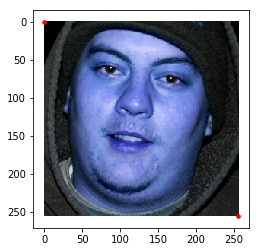

In [18]:
a = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/256x256/HELEN_test/testset/30542618_1.png'
img = cv2.imread(a)
with open(os.path.dirname(a)+'/bbox_list.txt','r') as bb:
    lines = bb.read()
    lines = lines.split('\n')
    for line in lines:
        line = line.split(' ')
        if line[0] == '30542618_1.png':
            plt.imshow(img)
            plt.scatter(line[1],line[2],s=50,c='r',marker='.')
            plt.scatter(line[3],line[4],s=50,c='r',marker='.')
            plt.show()


# 12 eye landmarks for 300W

In [6]:
inout = ['01_Indoor','02_Outdoor']
fix_size_list = [256,512]
for fix_size in fix_size_list:
    for io in inout:
        w_root = 'D:/share/new_dataset/gaze_dataset_on_web/300W/'+ io 
        txt_root = 'D:/share/new_dataset/gaze_dataset_on_web/300W_FIX/'+ io 
        save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/'+str(fix_size)+'x'+str(fix_size)+'/300W/'+ io
        if not os.path.exists(save_root):
            os.makedirs(save_root)
        pts = glob.glob(w_root+'/*.pts')
        for p in pts:
            with open(p,'r') as lines:
                name = os.path.basename(p)
                img = os.path.join(w_root,name[:-4]+'.png')
                save_txt = os.path.join(save_root,name[:-4]+'.txt')
                img = cv2.imread(img)
                h,w,c = img.shape 
                lines = lines.read().split('\n')[3:71]
                anc = [line.split(' ') for line in lines]
                anc = np.array(anc).astype(np.float)
                x1 = int(min(anc[:,0])+0.5)
                x2 = int(max(anc[:,0])+0.5)
                y1 = int(min(anc[:,1])+0.5)
                y2 = int(max(anc[:,1])+0.5)
                cx = int((x1 + x2)*0.5+0.5)
                cy = int((y1 + y2)*0.5+0.5)
                width = int((x2 - x1)*2/3+0.5)
                height = int((y2 - y1)*2/3+0.5)
                s = max(width,height)        
                lines = np.genfromtxt(os.path.join(txt_root,name[:-4]+'.txt'),delimiter=',')
                lines = lines[:,2:]

                # crop image into 256x256 sqare shape and generate new landmark coord
                if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                    nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                    if cx < width:
                        nx1 = 0
                    if cx + width > w:
                        nx2 = w
                    if cy < height:
                        ny1 = 0
                    if cy + height>h:
                        ny2 = h

                    crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                    print(name)

                    img = img[ny1:ny2,nx1:nx2]
                    print(ny1,ny2,nx1,nx2)
                    crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                             s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img

                    crop_h,crop_w,_ = crop_img.shape
                    ratio_h = fix_size/crop_h
                    ratio_w = fix_size/crop_w
                    crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                    with open(save_txt,'w+') as f:
                        for i,line in enumerate(lines):
                            x = int((float(line[0])-nx1+(s-(cx-nx1)))*ratio_w+0.5)
                            y = int((float(line[1])-ny1+(s-(cy-ny1)))*ratio_h+0.5)
                            f.write(str(i//7)+','+str(i%7)+','+str(x)+','+str(y)+'\n')
                    cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img)
                else:
                    crop_img = img[cy-s:cy+s,cx-s:cx+s]
                    ratio_h = fix_size/(s*2)
                    ratio_w = fix_size/(s*2)
                    crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                    with open(save_txt,'w+') as f:
                        for i,line in enumerate(lines):
                            x = int((float(line[0])-(cx - s))*ratio_w+0.5)
                            y = int((float(line[1])-(cy - s))*ratio_h+0.5)
                            f.write(str(i//7)+','+str(i%7)+','+str(x)+','+str(y)+'\n')   
                    cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img) 

indoor_002.pts
137 533 146 572
indoor_005.pts
54 454 122 540
indoor_006.pts
15 741 197 979
indoor_019.pts
158 525 143 541
indoor_020.pts
137 768 0 683
indoor_024.pts
139 600 7 511
indoor_044.pts
0 420 82 614
indoor_046.pts
156 534 518 916
indoor_051.pts
373 1395 0 901
indoor_052.pts
13 580 3 539
indoor_053.pts
151 825 599 1321
indoor_055.pts
76 400 114 460
indoor_058.pts
0 253 74 326
indoor_071.pts
78 350 0 293
indoor_072.pts
0 606 0 576
indoor_078.pts
83 361 0 277
indoor_079.pts
51 361 230 500
indoor_093.pts
38 544 188 758
indoor_094.pts
37 642 190 748
indoor_095.pts
364 1086 366 1124
indoor_096.pts
71 329 67 353
indoor_097.pts
93 375 164 482
indoor_098.pts
10 426 99 553
indoor_128.pts
201 639 0 427
indoor_156.pts
864 1158 0 278
indoor_166.pts
160 750 194 774
indoor_168.pts
18 364 183 537
indoor_215.pts
0 708 170 904
indoor_238.pts
0 985 51 885
indoor_239.pts
186 767 258 774
indoor_240.pts
0 532 0 615
indoor_253.pts
193 720 302 978
indoor_255.pts
0 121 17 155
indoor_261.pts
110 360 19

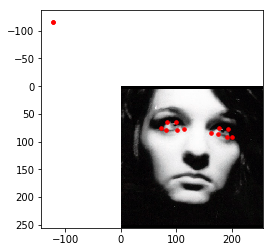

In [82]:
# b = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW/trainset/image_0113.pts' 
a = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W/01_Indoor/indoor_095.png'
img = cv2.imread(a)
txt = np.genfromtxt(a[:-4]+'.txt',delimiter=',').astype(np.int)
txt = txt[:,2:] 
plt.imshow(img)
plt.scatter(txt[:,0],txt[:,1],s=50,c='r',marker='.')
plt.show()

# 68 facial landmarks for 300W

In [86]:
inout = ['01_Indoor','02_Outdoor']
fix_size = 256
for io in inout:
    w_root = 'D:/share/new_dataset/gaze_dataset_on_web/300W/'+ io 
    save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/'+io
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    pts = glob.glob(w_root+'/*.pts')
    for p in pts:
        with open(p,'r') as lines:
            name = os.path.basename(p)
            lines = lines.read().split('\n')[3:71]
            anc = [line.split(' ') for line in lines]
            anc = np.array(anc).astype(np.float)
            min_w = int(min(anc[:,0])+0.5)
            max_w = int(max(anc[:,0])+0.5)
            min_h = int(min(anc[:,1])+0.5)
            max_h = int(max(anc[:,1])+0.5)
            cx = int((max_w + min_w)*0.5+0.5)
            cy = int((max_h + min_h)*0.5+0.5)
            width = int((max_w - min_w)*2/3+0.5)
            height = int((max_h - min_h)*2/3+0.5)
            s = max(width,height)        
            img = os.path.join(w_root,name[:-4]+'.png')
            save_txt = os.path.join(save_root,name[:-4]+'.txt')
            img = cv2.imread(img)
            h,w,c = img.shape  
            print('save:',save_root,name[:-4]+'.png')
            # crop image into 256x256 sqare shape and generate new landmark coord
            if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                if cx < width:
                    nx1 = 0
                if cx + width > w:
                    nx2 = w
                if cy < height:
                    ny1 = 0
                if cy + height>h:
                    ny2 = h

                crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                print(name)

                img = img[ny1:ny2,nx1:nx2]
                print(ny1,ny2,nx1,nx2)
                crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                         s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img
                crop_h,crop_w,_ = crop_img.shape
                ratio_h = fix_size/crop_h
                ratio_w = fix_size/crop_w
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'w+') as f:
                    for i,a in enumerate(anc):
                        a[0] = int((a[0]-nx1+(s-(cx-nx1)))*ratio_w+0.5)
                        a[1] = int((a[1]-ny1+(s-(cy-ny1)))*ratio_h+0.5)
                        a = a.astype(np.int)
                        x = a[0]
                        y = a[1]
                        f.write(str(x)+','+str(y)+'\n')
                cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img)
            else:
                crop_img = img[cy-s:cy+s,cx-s:cx+s]
                ratio_h = fix_size/(s*2)
                ratio_w = fix_size/(s*2)
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'w+') as f:
                    for i,a in enumerate(anc):
                        a[0] = int((a[0]-(cx - s))*ratio_w+0.5)
                        a[1] = int((a[1]-(cy - s))*ratio_h+0.5)
                        a = a.astype(np.int)
                        x = a[0]
                        y = a[1]
                        f.write(str(x)+','+str(y)+'\n')        
                cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img)

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_001.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_002.png
indoor_002.pts
137 533 146 572
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_003.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_004.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_005.png
indoor_005.pts
54 454 122 540
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_006.png
indoor_006.pts
15 741 197 979
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_007.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_008.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_009.png
save: D:/share/new_dataset/

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_085.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_086.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_087.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_088.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_089.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_090.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_091.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_092.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_093.png
indoor_093.pts
38 544 188 758
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoo

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_170.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_171.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_172.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_173.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_174.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_175.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_176.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_177.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_178.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_179.png
save: D:/share/new_d

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_253.png
indoor_253.pts
193 720 302 978
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_254.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_255.png
indoor_255.pts
0 121 17 155
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_256.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_257.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_258.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_259.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_260.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor indoor_261.png
indoor_261.pts
110 360 19 309
save: D:/share/new_dataset/ne

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_033.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_034.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_035.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_036.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_037.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_038.png
outdoor_038.pts
0 411 95 559
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_039.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_040.png
outdoor_040.pts
38 367 66 420
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_041.png
outdoor_041.pts
0 506 150 664
save: D:/sh

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_113.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_114.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_115.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_116.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_117.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_118.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_119.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_120.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_121.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_122.png


save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_194.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_195.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_196.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_197.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_198.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_199.png
outdoor_199.pts
851 1177 3122 3504
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_200.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_201.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_202.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_276.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_277.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_278.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_279.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_280.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_281.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_282.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_283.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_284.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/02_Outdoor outdoor_285.png


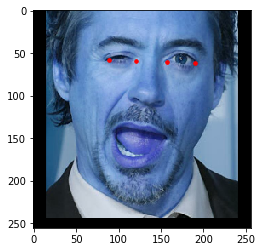

In [87]:

# b = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW/trainset/image_0113.pts' 
a = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/300W_68/01_Indoor/indoor_094.png'
img = cv2.imread(a)
txt = np.genfromtxt(a[:-4]+'.txt',delimiter=',').astype(np.int)
txt = txt[[36,39,42,45],:] 
plt.imshow(img)
plt.scatter(txt[:,0],txt[:,1],s=50,c='r',marker='.')
plt.show()

# eval data for 300W

In [33]:
inout = ['01_Indoor','02_Outdoor']
fix_size = 512
for io in inout:
    w_root = 'D:/share/new_dataset/gaze_dataset_on_web/300W/'+ io 
    save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/512x512/300W_eval/'+io
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    pts = glob.glob(w_root+'/*.pts')
    for p in pts:
        with open(p,'r') as lines:
            name = os.path.basename(p)
            lines = lines.read().split('\n')[3:71]
            anc = [line.split(' ') for line in lines]
            anc = np.array(anc).astype(np.float)
            min_w = int(min(anc[:,0])+0.5)
            max_w = int(max(anc[:,0])+0.5)
            min_h = int(min(anc[:,1])+0.5)
            max_h = int(max(anc[:,1])+0.5)
            cx = int((max_w + min_w)*0.5+0.5)
            cy = int((max_h + min_h)*0.5+0.5)
            width = int((max_w - min_w)*2/3+0.5)
            height = int((max_h - min_h)*2/3+0.5)
            s = max(width,height)        
            img = os.path.join(w_root,name[:-4]+'.png')
            save_txt = os.path.join(save_root,'bbox_list.txt')
            img = cv2.imread(img)
            h,w,c = img.shape  
            # crop image into 256x256 sqare shape and generate new landmark coord
            if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                if cx < width:
                    nx1 = 0
                if cx + width > w:
                    nx2 = w
                if cy < height:
                    ny1 = 0
                if cy + height>h:
                    ny2 = h

                crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                print(name)

                img = img[ny1:ny2,nx1:nx2]
                print(ny1,ny2,nx1,nx2)
                crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                         s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img
                crop_h,crop_w,_ = crop_img.shape
                ratio_h = fix_size/crop_h
                ratio_w = fix_size/crop_w
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'a+') as f:
                    f.write(io+'/'+name[:-4] + '.png' + ' ' +
                            str(int((s-(cx-nx1))*ratio_w+0.5)+1) + ' ' + str(int((s-(cy-ny1))*ratio_h+0.5)+1) + ' ' +
                            str(int((s-(cx-nx1)+img.shape[1])*ratio_w+0.5)) + ' ' + str(int((s-(cy-ny1)+img.shape[0])*ratio_h+0.5)) + '\n')
                cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img)
            else:
                crop_img = img[cy-s:cy+s,cx-s:cx+s]
                ratio_h = fix_size/(s*2)
                ratio_w = fix_size/(s*2)
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'a+') as f:
                    f.write(io+'/'+name[:-4] + '.png 1 1 '+
                            str(crop_img.shape[1]) + ' ' + str(crop_img.shape[0]) + '\n')      
                cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img)

indoor_002.pts
137 533 146 572
indoor_005.pts
54 454 122 540
indoor_006.pts
15 741 197 979
indoor_019.pts
158 525 143 541
indoor_020.pts
137 768 0 683
indoor_024.pts
139 600 7 511
indoor_044.pts
0 420 82 614
indoor_046.pts
156 534 518 916
indoor_051.pts
373 1395 0 901
indoor_052.pts
13 580 3 539
indoor_053.pts
151 825 599 1321
indoor_055.pts
76 400 114 460
indoor_058.pts
0 253 74 326
indoor_071.pts
78 350 0 293
indoor_072.pts
0 606 0 576
indoor_078.pts
83 361 0 277
indoor_079.pts
51 361 230 500
indoor_093.pts
38 544 188 758
indoor_094.pts
37 642 190 748
indoor_095.pts
364 1086 366 1124
indoor_096.pts
71 329 67 353
indoor_097.pts
93 375 164 482
indoor_098.pts
10 426 99 553
indoor_128.pts
201 639 0 427
indoor_156.pts
864 1158 0 278
indoor_166.pts
160 750 194 774
indoor_168.pts
18 364 183 537
indoor_215.pts
0 708 170 904
indoor_238.pts
0 985 51 885
indoor_239.pts
186 767 258 774
indoor_240.pts
0 532 0 615
indoor_253.pts
193 720 302 978
indoor_255.pts
0 121 17 155
indoor_261.pts
110 360 19

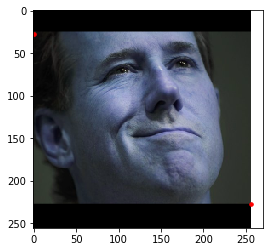

In [30]:
a = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/256x256/300W_eval/01_Indoor/indoor_044.png'
img = cv2.imread(a)
with open(os.path.dirname(a)+'/bbox_list.txt','r') as bb:
    lines = bb.read()
    lines = lines.split('\n')
    for line in lines:
        line = line.split(' ')
        if line[0] == '01_Indoor/indoor_044.png':
            plt.imshow(img)
            plt.scatter(line[1],line[2],s=50,c='r',marker='.')
            plt.scatter(line[3],line[4],s=50,c='r',marker='.')
            plt.show()


# 12 eye landmarks for LFPW

In [8]:
traintest = ['trainset','testset']
fix_size_list = [256,512]
for fix_size in fix_size_list:
    for tt in traintest:
        w_root = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW/'+ tt 
        txt_root = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW_FIX/'+ tt 
        save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/'+str(fix_size)+'x'+str(fix_size)+'/LFPW/'+ tt
        if not os.path.exists(save_root):
            os.makedirs(save_root)
        pts = glob.glob(w_root+'/*.pts')
        for p in pts:
            with open(p,'r') as lines:
                name = os.path.basename(p)
                img = os.path.join(w_root,name[:-4]+'.png')
                save_txt = os.path.join(save_root,name[:-4]+'.txt')
                img = cv2.imread(img)
                h,w,c = img.shape 
                lines = lines.read().split('\n')[3:71]
                anc = [line.split(' ')[:2] for line in lines]
                anc = np.array(anc).astype(np.float)
                x1 = int(min(anc[:,0])+0.5)
                x2 = int(max(anc[:,0])+0.5)
                y1 = int(min(anc[:,1])+0.5)
                y2 = int(max(anc[:,1])+0.5)
                cx = int((x1 + x2)*0.5+0.5)
                cy = int((y1 + y2)*0.5+0.5)
                width = int((x2 - x1)*2/3+0.5)
                height = int((y2 - y1)*2/3+0.5)
                s = max(width,height)        
                lines = np.genfromtxt(os.path.join(txt_root,name[:-4]+'.txt'),delimiter=',')
                lines = lines[:,2:]

                # crop image into 256x256 sqare shape and generate new landmark coord
                if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                    nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                    if cx < width:
                        nx1 = 0
                    if cx + width > w:
                        nx2 = w
                    if cy < height:
                        ny1 = 0
                    if cy + height>h:
                        ny2 = h

                    crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                    print(name)

                    img = img[ny1:ny2,nx1:nx2]
                    print(ny1,ny2,nx1,nx2)
                    crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                             s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img

                    crop_h,crop_w,_ = crop_img.shape
                    ratio_h = fix_size/crop_h
                    ratio_w = fix_size/crop_w
                    crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                    with open(save_txt,'w+') as f:
                        for i,line in enumerate(lines):
                            x = int((float(line[0])-nx1+(s-(cx-nx1)))*ratio_w+0.5)
                            y = int((float(line[1])-ny1+(s-(cy-ny1)))*ratio_h+0.5)
                            f.write(str(i//7)+','+str(i%7)+','+str(x)+','+str(y)+'\n')
                    cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img)
                else:
                    crop_img = img[cy-s:cy+s,cx-s:cx+s]
                    ratio_h = fix_size/(s*2)
                    ratio_w = fix_size/(s*2)
                    crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                    with open(save_txt,'w+') as f:
                        for i,line in enumerate(lines):
                            x = int((float(line[0])-(cx - s))*ratio_w+0.5)
                            y = int((float(line[1])-(cy - s))*ratio_h+0.5)
                            f.write(str(i//7)+','+str(i%7)+','+str(x)+','+str(y)+'\n')   
                    cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img) 

image_0121.pts
71 400 35 389
image_0122.pts
70 400 22 392
image_0142.pts
135 305 0 173
image_0150.pts
61 300 126 396
image_0182.pts
475 765 768 1024
image_0196.pts
122 348 160 398
image_0199.pts
70 328 0 240
image_0200.pts
10 365 5 387
image_0206.pts
26 312 72 390
image_0211.pts
101 452 117 543
image_0222.pts
110 424 187 517
image_0250.pts
87 300 113 369
image_0252.pts
141 353 3 201
image_0274.pts
73 335 110 404
image_0284.pts
105 370 224 498
image_0285.pts
526 678 0 154
image_0319.pts
16 351 89 411
image_0320.pts
134 432 180 453
image_0330.pts
1549 2144 652 1272
image_0332.pts
82 301 232 450
image_0348.pts
31 276 141 387
image_0351.pts
75 297 239 435
image_0354.pts
82 344 3 253
image_0368.pts
50 224 318 508
image_0378.pts
53 261 111 295
image_0380.pts
163 553 16 406
image_0385.pts
111 429 28 346
image_0387.pts
129 403 146 399
image_0396.pts
101 227 0 131
image_0412.pts
142 458 110 413
image_0413.pts
96 332 0 222
image_0415.pts
136 402 0 269
image_0421.pts
112 313 110 360
image_0423.pt

In [ ]:
# b = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW/trainset/image_0113.pts' 
a = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW/trainset/image_0007.png'
img = cv2.imread(a)
txt = np.genfromtxt(a[:-4]+'.txt',delimiter=',').astype(np.int)
txt = txt[:,2:] 
plt.imshow(img)
plt.scatter(txt[:,0],txt[:,1],s=50,c='r',marker='.')
plt.show()

# 68 facial landmarks for LFPW

In [88]:
inout = ['trainset','testset']
fix_size = 256
for io in inout:
    w_root = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW/'+ io 
    save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/'+io
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    pts = glob.glob(w_root+'/*.pts')
    for p in pts:
        with open(p,'r') as lines:
            name = os.path.basename(p)
            lines = lines.read().split('\n')[3:71]
            anc = [line.split(' ')[:2] for line in lines]
            anc = np.array(anc).astype(np.float)
            min_w = int(min(anc[:,0])+0.5)
            max_w = int(max(anc[:,0])+0.5)
            min_h = int(min(anc[:,1])+0.5)
            max_h = int(max(anc[:,1])+0.5)
            cx = int((max_w + min_w)*0.5+0.5)
            cy = int((max_h + min_h)*0.5+0.5)
            width = int((max_w - min_w)*2/3+0.5)
            height = int((max_h - min_h)*2/3+0.5)
            s = max(width,height)        
            img = os.path.join(w_root,name[:-4]+'.png')
            save_txt = os.path.join(save_root,name[:-4]+'.txt')
            img = cv2.imread(img)
            h,w,c = img.shape  
            print('save:',save_root,name[:-4]+'.png')
            # crop image into 256x256 sqare shape and generate new landmark coord
            if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                if cx < width:
                    nx1 = 0
                if cx + width > w:
                    nx2 = w
                if cy < height:
                    ny1 = 0
                if cy + height>h:
                    ny2 = h

                crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                print(name)

                img = img[ny1:ny2,nx1:nx2]
                print(ny1,ny2,nx1,nx2)
                crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                         s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img
                crop_h,crop_w,_ = crop_img.shape
                ratio_h = fix_size/crop_h
                ratio_w = fix_size/crop_w
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'w+') as f:
                    for i,a in enumerate(anc):
                        a[0] = int((a[0]-nx1+(s-(cx-nx1)))*ratio_w+0.5)
                        a[1] = int((a[1]-ny1+(s-(cy-ny1)))*ratio_h+0.5)
                        a = a.astype(np.int)
                        x = a[0]
                        y = a[1]
                        f.write(str(x)+','+str(y)+'\n')
                cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img)
            else:
                crop_img = img[cy-s:cy+s,cx-s:cx+s]
                ratio_h = fix_size/(s*2)
                ratio_w = fix_size/(s*2)
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'w+') as f:
                    for i,a in enumerate(anc):
                        a[0] = int((a[0]-(cx - s))*ratio_w+0.5)
                        a[1] = int((a[1]-(cy - s))*ratio_h+0.5)
                        a = a.astype(np.int)
                        x = a[0]
                        y = a[1]
                        f.write(str(x)+','+str(y)+'\n')        
                cv2.imwrite(os.path.join(save_root,name[:-4]+'.png'),crop_img)

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0001.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0002.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0003.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0004.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0005.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0006.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0007.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0008.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0009.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0010.png
save: D:/share/new_dataset/new

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0097.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0098.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0099.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0100.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0101.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0102.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0103.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0104.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0105.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0106.png
save: D:/share/new_dataset/new

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0196.png
image_0196.pts
122 348 160 398
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0197.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0198.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0199.png
image_0199.pts
70 328 0 240
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0200.png
image_0200.pts
10 365 5 387
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0201.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0202.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0203.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0204.png
save: D:/share/new_dataset/new_human_pow

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0284.png
image_0284.pts
105 370 224 498
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0285.png
image_0285.pts
526 678 0 154
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0286.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0288.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0289.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0290.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0291.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0292.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0293.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LF

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0375.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0376.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0377.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0378.png
image_0378.pts
53 261 111 295
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0379.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0380.png
image_0380.pts
163 553 16 406
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0381.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0382.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0383.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LF

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0461.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0462.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0463.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0464.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0465.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0466.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0467.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0468.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0469.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0470.png
save: D:/share/new_dataset/new

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0547.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0548.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0549.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0550.png
image_0550.pts
88 298 0 182
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0551.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0552.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0553.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0554.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0555.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0556.png
sa

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0634.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0635.png
image_0635.pts
447 633 0 150
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0636.png
image_0636.pts
134 252 341 451
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0637.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0638.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0639.png
image_0639.pts
299 425 0 99
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0640.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0641.png
image_0641.pts
181 331 432 580
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0642.png
save: D:

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0726.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0727.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0728.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0729.png
image_0729.pts
107 309 134 348
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0730.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0731.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0732.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0733.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0734.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0735.png

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0812.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0814.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0815.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0816.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0817.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0818.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0819.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0820.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0822.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/trainset image_0823.png
save: D:/share/new_dataset/new

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0033.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0034.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0035.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0036.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0037.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0038.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0039.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0040.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0041.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0042.png
save: D:/share/new_dataset/new_human_pow

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0125.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0126.png
image_0126.pts
232 598 49 425
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0127.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0128.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0129.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0132.png
image_0132.pts
86 250 0 154
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0133.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0134.png
image_0134.pts
41 245 305 500
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0136.png
save: D:/share/new_dataset/new_human_power_reord

save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0221.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0222.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0223.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0224.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0225.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0226.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0227.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0228.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0229.png
save: D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset image_0230.png
save: D:/share/new_dataset/new_human_pow

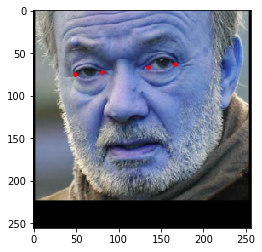

In [89]:

# b = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW/trainset/image_0113.pts' 
a = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/LFPW_68/testset/image_0113.png'
img = cv2.imread(a)
txt = np.genfromtxt(a[:-4]+'.txt',delimiter=',').astype(np.int)
txt = txt[[36,39,42,45],:] 
plt.imshow(img)
plt.scatter(txt[:,0],txt[:,1],s=50,c='r',marker='.')
plt.show()

# Eval data for LFPW 

In [34]:
import scipy.io as sio
fix_size = 512
traintest = ['testset']
bbox_root = 'D:/share/new_dataset/gaze_dataset_on_web/Bounding_Boxes'
for tt in traintest:
    HELEN_root = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW_FIX/'+tt
    save_root = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/512x512/LFPW_eval/'+ tt
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    test = sio.loadmat(bbox_root + '/bounding_boxes_LFPW_'+tt)
    # print(test['bounding_boxes'])
    for bb in test['bounding_boxes']:
        for t in bb:
            img = os.path.join(HELEN_root,t[0][0][0][0][:-4]+'.png')
            save_txt = os.path.join(save_root,'bbox_list.txt')
            img = cv2.imread(img)
            h,w,c = img.shape
            x1 = int(t[0][0][2][0][0]+0.5)
            y1 = int(t[0][0][2][0][1]+0.5)
            x2 = int(t[0][0][2][0][2]+0.5)
            y2 = int(t[0][0][2][0][3]+0.5)
            cx = int((x1 + x2)*0.5+0.5)
            cy = int((y1 + y2)*0.5+0.5)
            width = int((x2 - x1)*2/3+0.5)
            height = int((y2 - y1)*2/3+0.5)
            s = max(width,height)

            if cx-s<0 or cx+s>w or cy-s<0 or cy+s>h:
                nx1,nx2,ny1,ny2 = cx-width,cx+width,cy-height,cy+height
                if cx < width:
                    nx1 = 0
                if cx + width > w:
                    nx2 = w
                if cy < height:
                    ny1 = 0
                if cy + height>h:
                    ny2 = h

                crop_img = np.zeros((s*2,s*2,3),dtype = np.float32) 
                print(t[0][0][0][0])
                img = img[ny1:ny2,nx1:nx2]
                print(ny1,ny2,nx1,nx2)
                
                crop_img[s-(cy-ny1):s-(cy-ny1)+img.shape[0],
                         s-(cx-nx1):s-(cx-nx1)+img.shape[1]] = img
                
                crop_h,crop_w,_ = crop_img.shape
                ratio_h = fix_size/crop_h
                ratio_w = fix_size/crop_w
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'a+') as f:
                    f.write('testset/'+t[0][0][0][0][:-4] + '.png' + ' ' +
                            str(int((s-(cx-nx1))*ratio_w+0.5)+1) + ' ' + str(int((s-(cy-ny1))*ratio_h+0.5)+1) + ' ' +
                            str(int((s-(cx-nx1)+img.shape[1])*ratio_w+0.5)) + ' ' + str(int((s-(cy-ny1)+img.shape[0])*ratio_h+0.5)) + '\n')
                cv2.imwrite(os.path.join(save_root,t[0][0][0][0][:-4]+'.png'),crop_img)
            else:
                crop_img = img[cy-s:cy+s,cx-s:cx+s]
                ratio_h = fix_size/(s*2)
                ratio_w = fix_size/(s*2)
                crop_img = cv2.resize(crop_img,(fix_size,fix_size))
                with open(save_txt,'a+') as f:
                    f.write('testset/'+t[0][0][0][0][:-4] + '.png 1 1 '+
                            str(crop_img.shape[1]) + ' ' + str(crop_img.shape[0]) + '\n')      
                cv2.imwrite(os.path.join(save_root,t[0][0][0][0][:-4]+'.png'),crop_img)

image_0012.png
130 426 109 427
image_0013.png
198 406 0 179
image_0032.png
0 338 300 690
image_0071.png
164 524 138 506
image_0087.png
111 261 271 400
image_0099.png
134 412 221 503
image_0113.png
91 372 33 349
image_0126.png
232 598 49 425
image_0132.png
86 250 0 154
image_0134.png
41 245 305 500
image_0168.png
39 175 294 425
image_0195.png
128 470 6 332
image_0204.png
98 358 0 256
image_0215.png
91 319 90 358
image_0239.png
109 379 158 400


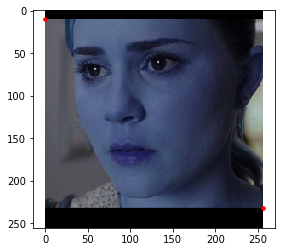

In [23]:

a = 'D:/share/new_dataset/new_human_power_reorder/dirl_new_face/256x256/LFPW_eval/testset/image_0032.png'
img = cv2.imread(a)
with open(os.path.dirname(a)+'/bbox_list.txt','r') as bb:
    lines = bb.read()
    lines = lines.split('\n')
    for line in lines:
        line = line.split(' ')
        if line[0] == 'image_0032.png':
            plt.imshow(img)
            plt.scatter(line[1],line[2],s=50,c='r',marker='.')
            plt.scatter(line[3],line[4],s=50,c='r',marker='.')
            plt.show()
